In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data
# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)
# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [51]:
x_train, x_test, y_train, y_test =  train_test_split(iris_data, iris_label,
                                    test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

In [52]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,
            feature_names=iris.feature_names, impurity=True,filled=True)

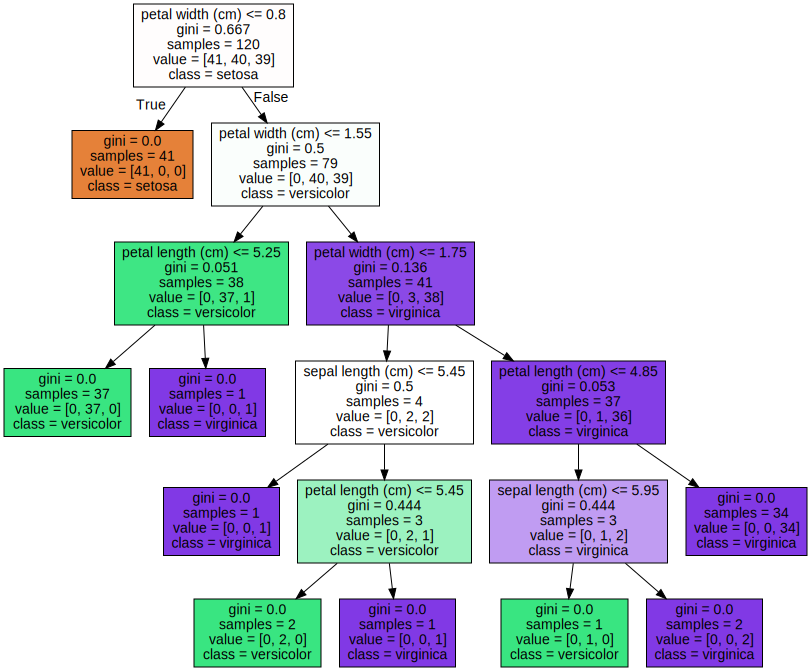

In [27]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [13]:
x_train, x_test, y_train, y_test =  train_test_split(iris_data, iris_label,
                                    test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(max_depth=3,random_state=11)
# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

In [14]:
export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,
            feature_names=iris.feature_names, impurity=True,filled=True)

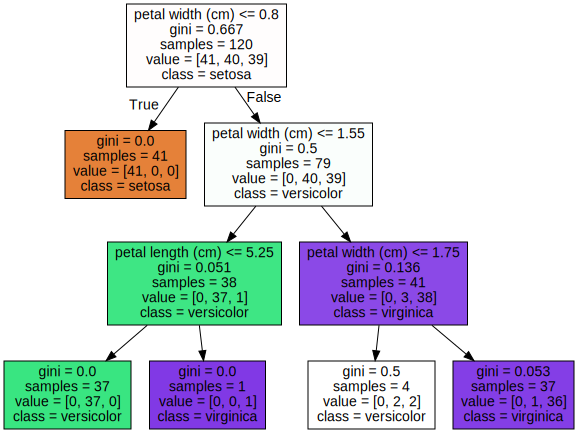

In [15]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

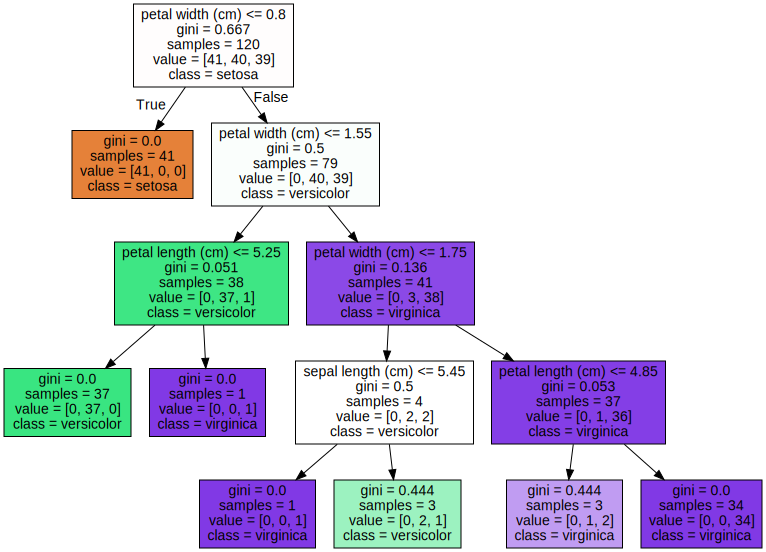

In [48]:
x_train, x_test, y_train, y_test =  train_test_split(iris_data, iris_label,
                                    test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(min_samples_split=4,random_state=11)
# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,
            feature_names=iris.feature_names, impurity=True,filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

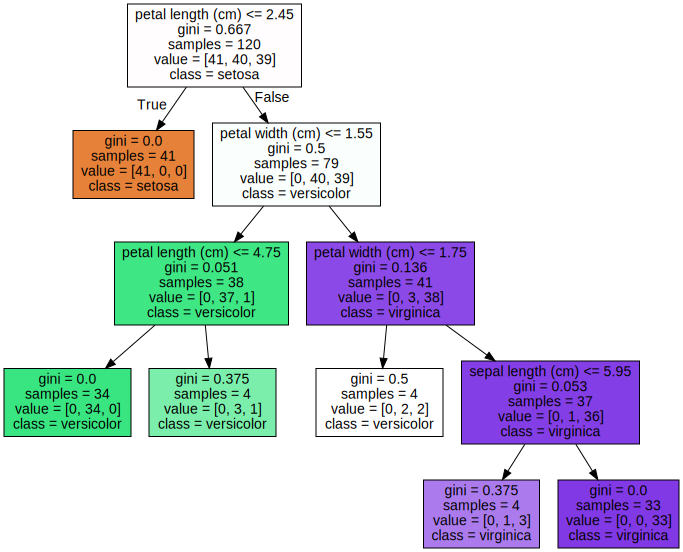

In [56]:
x_train, x_test, y_train, y_test =  train_test_split(iris_data, iris_label,
                                    test_size=0.2, random_state=11)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(min_samples_leaf=4,random_state=156)
# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

export_graphviz(dt_clf, out_file='tree.dot',class_names=iris.target_names,
            feature_names=iris.feature_names, impurity=True,filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importance: 
[0.006 0.    0.546 0.448]
sepal length (cm) :0.006
sepal width (cm) :0.000
petal length (cm) :0.546
petal width (cm) :0.448


<AxesSubplot: >

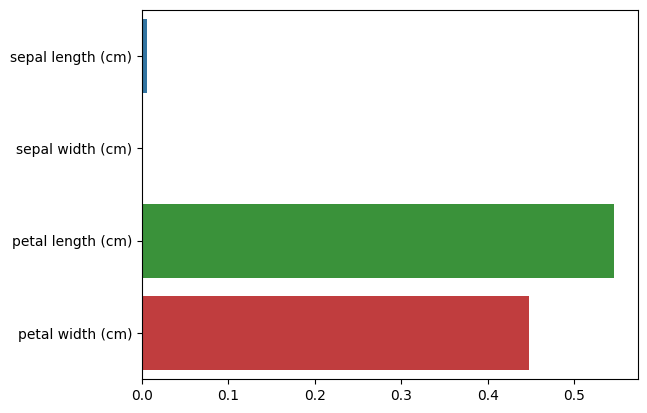

In [57]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importance: \n{0}'.format(np.round(dt_clf.feature_importances_,3)))

for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0} :{1:.3f}'.format(name,value))

sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)